In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [8]:
df = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
df.isna().sum()/(len(df))*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [10]:
df = df.dropna()
df = df.reset_index(drop = True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [11]:
df.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10678,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [14]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-06-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,2022-06-05 05:50:00,2022-06-05 13:15:00,7h 25m,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-06-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-06-05 18:05:00,2022-06-05 23:30:00,5h 25m,1 stop,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-06-05 16:50:00,2022-06-05 21:35:00,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-06-05 19:55:00,2022-06-05 22:25:00,2h 30m,non-stop,4107
10678,Air India,2019-04-27,Kolkata,Banglore,2022-06-05 20:45:00,2022-06-05 23:20:00,2h 35m,non-stop,4145
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-06-05 08:20:00,2022-06-05 11:20:00,3h,non-stop,7229
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-06-05 11:30:00,2022-06-05 14:10:00,2h 40m,non-stop,12648


In [15]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

    return df

def duration_minutes(df): 
    df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

    return df 

def dep_arrival_extract(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df

In [16]:
year_month_extract(df, "Date_of_Journey")

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-06-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,2022-06-05 05:50:00,2022-06-05 13:15:00,7h 25m,2 stops,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-06-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-06-05 18:05:00,2022-06-05 23:30:00,5h 25m,1 stop,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-06-05 16:50:00,2022-06-05 21:35:00,4h 45m,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-06-05 19:55:00,2022-06-05 22:25:00,2h 30m,non-stop,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,2022-06-05 20:45:00,2022-06-05 23:20:00,2h 35m,non-stop,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-06-05 08:20:00,2022-06-05 11:20:00,3h,non-stop,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-06-05 11:30:00,2022-06-05 14:10:00,2h 40m,non-stop,12648,2019,1,3


In [17]:
duration_minutes(df)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-06-05 22:20:00,2022-03-22 01:10:00,170,non-stop,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,2022-06-05 05:50:00,2022-06-05 13:15:00,445,2 stops,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-06-05 09:25:00,2022-06-10 04:25:00,1140,2 stops,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-06-05 18:05:00,2022-06-05 23:30:00,325,1 stop,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-06-05 16:50:00,2022-06-05 21:35:00,285,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-06-05 19:55:00,2022-06-05 22:25:00,150,non-stop,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,2022-06-05 20:45:00,2022-06-05 23:20:00,155,non-stop,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-06-05 08:20:00,2022-06-05 11:20:00,180,non-stop,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-06-05 11:30:00,2022-06-05 14:10:00,160,non-stop,12648,2019,1,3


In [18]:
dep_arrival_extract(df, "Dep_Time")
dep_arrival_extract(df, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-06-05 22:20:00,2022-03-22 01:10:00,170,non-stop,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,2022-06-05 05:50:00,2022-06-05 13:15:00,445,2 stops,7662,2019,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-06-05 09:25:00,2022-06-10 04:25:00,1140,2 stops,13882,2019,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-06-05 18:05:00,2022-06-05 23:30:00,325,1 stop,6218,2019,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-06-05 16:50:00,2022-06-05 21:35:00,285,1 stop,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-06-05 19:55:00,2022-06-05 22:25:00,150,non-stop,4107,2019,9,4,19,55,22,25
10678,Air India,2019-04-27,Kolkata,Banglore,2022-06-05 20:45:00,2022-06-05 23:20:00,155,non-stop,4145,2019,4,27,20,45,23,20
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-06-05 08:20:00,2022-06-05 11:20:00,180,non-stop,7229,2019,4,27,8,20,11,20
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-06-05 11:30:00,2022-06-05 14:10:00,160,non-stop,12648,2019,1,3,11,30,14,10


In [20]:
df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time", "Date_of_Journey_year"], axis = 1, inplace=True)

In [21]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,non-stop,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,non-stop,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3,11,30,14,10


In [22]:
df.rename(columns = {'Total_Stops':'stop','Date_of_Journey_month':'month', 
                     'Date_of_Journey_day':'day', "Dep_Time_hour": "dep_hr", 
                     "Dep_Time_minute":"dep_min", "Arrival_Time_hour":"arr_hr", 
                     "Arrival_Time_minute":"arr_min"}, inplace = True)

In [23]:
df

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,non-stop,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,non-stop,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3,11,30,14,10


In [25]:
df["stop"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,0,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,0,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,0,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,0,12648,1,3,11,30,14,10


In [28]:
df["stop"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [29]:
print(df["Source"].unique())
print(df["Destination"].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [30]:
df = df.replace("Delhi", "New Delhi")
df = df.replace("Banglore", "Bengaluru")
df

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10


In [44]:
def geo_extraction(df, col1 = "Source", col2 = "Destination"):

    """"
    This function get the coordinates for the airports based on the city efficiently
    (using minimal calls from geopy API based only on unique cities instead of iterating 
    over all the cities ) 
    """

    src = list(df[col1].unique())
    des = list(df[col2].unique())

    cities = []

    for i in src, des:
      cities.append(i)
    cities = list(set(np.ravel(cities)))

    airport_name = []

    for city in cities:
        airport_name.append(city + " International Airport")

    airports_dict = dict(zip(cities, airport_name))

    airport_src = []
    airport_des = []

    for i, j in zip(df[col1], df[col2]):
        for k, v in airports_dict.items():
            if i == k:
                airport_src.append(v)
            if j == k:
                airport_des.append(v)

    df[col1 + "_Airport"] = airport_src
    df[col2 + "_Airport"] = airport_des

    geolocator = Nominatim(user_agent="my-flight-fare")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    lat = []
    lon = []

    for airport in airport_name:
        location = geolocator.geocode(airport)
        lat.append(location.latitude)
        lon.append(location.longitude)

    geo = tuple(zip(lat, lon))

    airport_geo = dict(zip(airport_name, geo))

    src_geo = []
    des_geo = []

    for src_airport, des_airport in zip(df[col1 + "_Airport"], df[col2 + "_Airport"]):
        for k, v in airport_geo.items():
            if src_airport == k:
                src_geo.append(v)
            if des_airport == k:
                des_geo.append(v)

    df[[col1 + '_Lat', col1 + '_Lon']] = pd.DataFrame(src_geo, index=df.index)
    df[[col2 + '_Lat', col2 + '_Lon']] = pd.DataFrame(des_geo, index=df.index)

    return df 

In [45]:
geo_extraction(df, "Source", "Destination")

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,Source_Airport,Destination_Airport,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,New Delhi International Airport,Cochin International Airport,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738


In [46]:
df

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,Source_Airport,Destination_Airport,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,New Delhi International Airport,Cochin International Airport,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738


In [47]:
df.drop(["Source_Airport", "Destination_Airport"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,13.196697,77.707587,28.555168,77.084738


In [48]:
# Haversine Formula 
from math import radians, cos, sin, asin, sqrt

def haversine_dist(lon1, lat1, lon2, lat2):

    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1 
    a = np.sin(dlat / 2.0)** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371 # radius of earth in km

    distance = c * r

    return distance

In [49]:
def add_distance(df):
    df["flight_distance"] = haversine_dist(df["Source_Lon"], 
    df["Source_Lat"], 
    df["Destination_Lon"], df["Destination_Lat"])

    df.drop(["Source_Lat", "Source_Lon", "Destination_Lat", "Destination_Lon"], axis = 1, inplace=True)
    return df

In [50]:
add_distance(df)

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,1708.999039
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,1546.957213
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,2047.335727
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,1546.957213
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,1708.999039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,1546.957213
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,1546.957213
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,1708.999039
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,1708.999039


In [51]:
df.corr()

,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance
Duration,1.000000,0.738071,0.506480,0.055136,-0.038360,0.002088,-0.019099,0.051531,-0.069663,0.311646
stop,0.738071,1.000000,0.603897,0.065495,-0.024136,-0.061476,-0.002618,0.038140,-0.106940,0.443709
Price,0.506480,0.603897,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.317873
month,0.055136,0.065495,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.005098
day,-0.038360,-0.024136,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,0.071908
dep_hr,0.002088,-0.061476,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,-0.069170
dep_min,-0.019099,-0.002618,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.072407
arr_hr,0.051531,0.038140,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.013037
arr_min,-0.069663,-0.106940,-0.086155,-0.025786,-0.021423,0.067911,-0.017597,-0.154363,1.000000,-0.172354
flight_distance,0.311646,0.443709,0.317873,0.005098,0.071908,-0.069170,-0.072407,0.013037,-0.172354,1.000000


### Encoding Categorical Variables

In [52]:
dummy_year = pd.get_dummies(df["Airline"], prefix="Airline", drop_first= True)
dummy_month = pd.get_dummies(df["Source"], prefix="Source", drop_first= True)
dummy_crime_type = pd.get_dummies(df["Destination"], prefix="Destination", drop_first= True)

In [53]:
df = pd.concat([df, dummy_year, dummy_month, dummy_crime_type], axis=1)
df.head()

,Airline,Source,Destination,Duration,stop,Price,month,day,dep_hr,dep_min,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,...,0,0,0,0,0,1,1,0,0,0
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df

,Duration,stop,Price,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,3,24,22,20,1,10,1708.999039,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1546.957213,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,2047.335727,...,0,0,0,0,0,1,1,0,0,0
3,325,1,6218,12,5,18,5,23,30,1546.957213,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,1708.999039,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0,4107,9,4,19,55,22,25,1546.957213,...,0,0,0,1,0,0,0,0,0,0
10678,155,0,4145,4,27,20,45,23,20,1546.957213,...,0,0,0,1,0,0,0,0,0,0
10679,180,0,7229,4,27,8,20,11,20,1708.999039,...,0,0,0,0,0,0,0,0,0,1
10680,160,0,12648,1,3,11,30,14,10,1708.999039,...,1,0,0,0,0,0,0,0,0,1


In [55]:
df.columns

Index(['Duration', 'stop', 'Price', 'month', 'day', 'dep_hr', 'dep_min',
       'arr_hr', 'arr_min', 'flight_distance', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

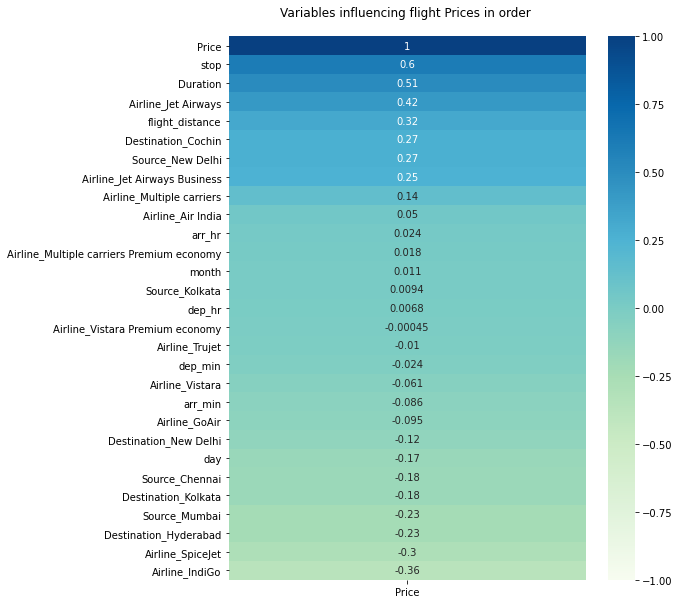

In [56]:
plt.rcParams['figure.figsize'] = [8, 10]

_ = sns.heatmap(df.corr()[['Price']]
                .sort_values(by='Price', ascending=False),
                vmin=-1,
                vmax=1,
                annot=True,
                cmap='GnBu');

_.set_title('Variables influencing flight Prices in order ',
            fontdict={'fontsize':12},
            pad=20);

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

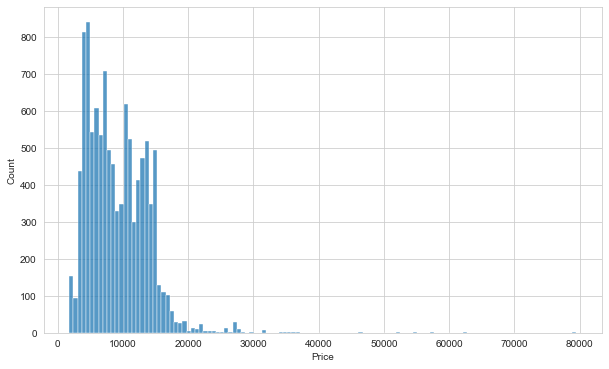

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x = df["Price"])

Text(0.5, 1.0, 'Box Plot for Price Range')

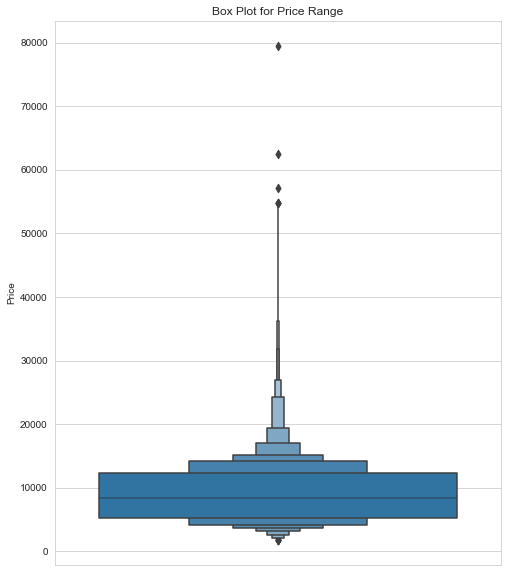

In [110]:
sns.boxenplot(y = df["Price"])
plt.title("Box Plot for Price Range")

In [109]:
df["Price"].mean()

9087.21456656057

In [60]:
df.columns

Index(['Duration', 'stop', 'Price', 'month', 'day', 'dep_hr', 'dep_min',
       'arr_hr', 'arr_min', 'flight_distance', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Train Test Split

In [61]:
x_input = df.loc[:, ['Duration', 'stop', 'month', 'day', 'dep_hr', 'dep_min',
       'arr_hr', 'arr_min', 'flight_distance', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
x_input

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3,24,22,20,1,10,1708.999039,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1546.957213,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,2047.335727,0,...,0,0,0,0,0,1,1,0,0,0
3,325,1,12,5,18,5,23,30,1546.957213,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,16,50,21,35,1708.999039,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0,9,4,19,55,22,25,1546.957213,0,...,0,0,0,1,0,0,0,0,0,0
10678,155,0,4,27,20,45,23,20,1546.957213,1,...,0,0,0,1,0,0,0,0,0,0
10679,180,0,4,27,8,20,11,20,1708.999039,0,...,0,0,0,0,0,0,0,0,0,1
10680,160,0,1,3,11,30,14,10,1708.999039,0,...,1,0,0,0,0,0,0,0,0,1


In [62]:
y = df["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10682, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_input, y, test_size=0.20, random_state=4) 

In [66]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
7723,135,0,6,6,9,45,12,0,1385.333389,0,...,0,1,0,0,0,0,0,1,0,3543
5769,810,2,5,21,5,30,19,0,2047.335727,0,...,0,0,0,0,1,1,0,0,0,13029
4544,660,1,3,24,21,10,8,10,1546.957213,0,...,0,0,1,0,0,0,0,0,0,14231
3617,790,1,9,6,7,10,20,20,1546.957213,0,...,0,0,1,0,0,0,0,0,0,9555
6558,170,0,1,3,22,20,1,10,1708.999039,0,...,0,0,0,0,0,0,0,0,1,11934


In [67]:
df_val = pd.concat([x_val, y_val], axis=1)
df_val.head()

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
7199,345,1,3,24,13,55,19,40,1546.957213,0,...,0,0,1,0,0,0,0,0,0,14231
9367,560,2,12,6,9,40,19,0,2047.335727,0,...,0,0,0,0,1,1,0,0,0,13014
10123,525,1,5,27,3,50,12,35,2047.335727,0,...,0,0,0,0,1,1,0,0,0,10197
9288,180,0,4,24,19,50,22,50,1708.999039,0,...,0,0,0,0,0,0,0,0,1,4544
8429,610,1,3,27,18,15,4,25,2047.335727,0,...,0,0,0,0,1,1,0,0,0,12242


## Importing Data for Modelling

In [68]:
def x_var(df):
    df = df.loc[:, ['Duration', 'stop', 'month', 'day', 'dep_hr', 'dep_min',
       'arr_hr', 'arr_min', 'flight_distance', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

    return df

In [69]:
def y_var(df):
    df = df["Price"]

    return df

In [71]:
x_train = x_var(df_train)
x_val = x_var(df_val)

In [76]:
from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['Duration', 'stop', 'month', 'day', 'dep_hr', 'dep_min',
       'arr_hr', 'arr_min', 'flight_distance']

scaler = MinMaxScaler()
x_train[col_to_scale] = scaler.fit_transform(x_train[col_to_scale])

In [77]:
x_val[col_to_scale] = scaler.transform(x_val[col_to_scale])

In [78]:
x_train

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7723,0.021544,0.00,0.454545,0.125000,0.391304,0.818182,0.521739,0.000000,0.535055,0,...,0,0,1,0,0,0,0,0,1,0
5769,0.263914,0.50,0.363636,0.750000,0.217391,0.545455,0.826087,0.000000,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
4544,0.210054,0.25,0.181818,0.875000,0.913043,0.181818,0.347826,0.181818,0.648569,0,...,0,0,0,1,0,0,0,0,0,0
3617,0.256732,0.25,0.727273,0.125000,0.304348,0.181818,0.869565,0.363636,0.648569,0,...,1,0,0,1,0,0,0,0,0,0
6558,0.034111,0.00,0.000000,0.000000,0.956522,0.363636,0.043478,0.181818,0.762376,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0.026930,0.00,0.454545,0.041667,0.826087,1.000000,0.956522,0.454545,0.648569,0,...,0,0,0,1,0,0,0,0,0,0
709,0.028725,0.00,0.454545,0.500000,0.739130,0.000000,0.826087,0.636364,0.762376,0,...,1,0,0,0,0,0,0,0,0,1
10679,0.037702,0.00,0.272727,1.000000,0.347826,0.363636,0.478261,0.363636,0.762376,0,...,0,0,0,0,0,0,0,0,0,1
8366,0.184919,0.50,1.000000,0.125000,0.521739,0.000000,0.913043,0.909091,0.648569,1,...,0,0,0,1,0,0,0,0,0,0


In [79]:
x_val

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7199,0.096948,0.25,0.181818,0.875,0.565217,1.000000,0.826087,0.727273,0.648569,0,...,0,0,0,1,0,0,0,0,0,0
9367,0.174147,0.50,1.000000,0.125,0.391304,0.727273,0.826087,0.000000,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
10123,0.161580,0.25,0.363636,1.000,0.130435,0.909091,0.521739,0.636364,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
9288,0.037702,0.00,0.272727,0.875,0.826087,0.909091,0.956522,0.909091,0.762376,0,...,0,0,0,0,0,0,0,0,0,1
8429,0.192101,0.25,0.181818,1.000,0.782609,0.272727,0.173913,0.454545,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0.341113,0.25,0.363636,0.500,0.260870,0.545455,1.000000,0.636364,0.648569,0,...,0,0,0,1,0,0,0,0,0,0
9016,0.028725,0.00,0.272727,0.625,0.260870,1.000000,0.391304,0.545455,0.648569,0,...,0,0,0,1,0,0,0,0,0,0
3970,0.407540,0.25,0.454545,0.125,0.956522,0.909091,0.826087,0.000000,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
4790,0.441652,0.25,0.454545,0.000,0.913043,0.454545,0.826087,0.181818,0.762376,0,...,0,0,0,0,0,0,0,0,0,1


## Modelling

In [80]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
y_pred = reg_rf.predict(x_val)

In [82]:
reg_rf.score(x_train, y_train)

0.949748544891678

In [83]:
reg_rf.score(x_val, y_val)

0.8306380765098818

<AxesSubplot:xlabel='Price', ylabel='Count'>

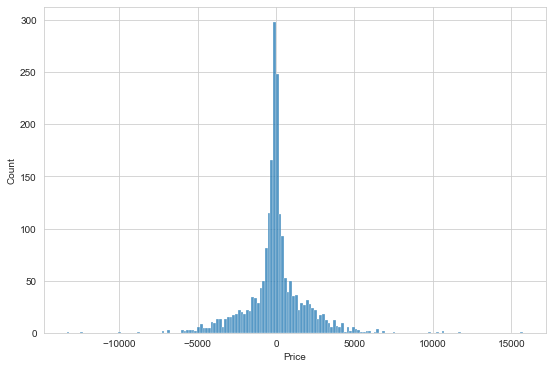

In [85]:
plt.figure(figsize = (9, 6))
sns.histplot(y_val - y_pred)

Text(0, 0.5, 'y_pred')

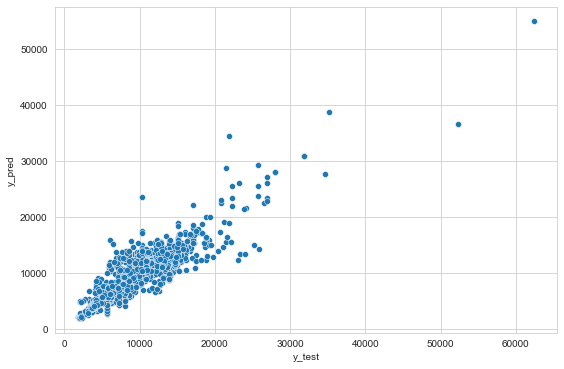

In [86]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_val, y = y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"The Mean Average Error is: {mean_absolute_error(y_val, y_pred)}")
print(f"The Mean Squared Error is: {mean_squared_error(y_val, y_pred)}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_val, y_pred))}")

The Mean Average Error is: 1195.8983236996326
The Mean Squared Error is: 3754898.608047879
The Root Mean Squared Error is: 1937.7560754769622


## Hyperparameter Tuning

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [89]:
model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [10,50,100]
        }
    },
    # 'SVR': {
    #     'model': SVR(),
    #     'params': {
    #         'n_neighbors': list(range(1,10)),
    #         'p': [1,2],
    #     }
    # },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['poisson','mae','mse'],
            'max_depth':[3,5,10]
        }
    },
    "XGBRegressor": {
        "model": XGBRegressor(use_label_encoder=False, booster='gbtree',
        eval_metric = "logloss"),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.01, .2, .3, .4, .5],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [90]:
scores = []

for model_name, mp in model_params.items():
    reg =  GridSearchCV(mp['model'], mp['params'], cv = 5, 
    scoring = "r2", return_train_score=False)
    reg.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': reg.best_score_,
        'best_params': reg.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [91]:
df_metrics

,model,best_score,best_params
0,random_forest,0.772320,"{'min_samples_leaf': 10, 'n_estimators': 100}"
1,decision_tree,0.739096,"{'criterion': 'mse', 'max_depth': 10}"
2,XGBRegressor,0.799723,"{'colsample_bytree': 0.8, 'learning_rate': 0.5..."


### XGBRegressor

In [92]:
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(colsample_bytree=0.8, learning_rate=0.5)
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
y_pred = reg_xgb.predict(x_val)

In [97]:
r2_score(y_val, y_pred)

0.8514143122449668

In [98]:
print(f"The Mean Average Error is: {mean_absolute_error(y_val, y_pred)}")
print(f"The Mean Squared Error is: {mean_squared_error(y_val, y_pred)}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_val, y_pred))}")

The Mean Average Error is: 1224.142685000786
The Mean Squared Error is: 3294271.703047611
The Root Mean Squared Error is: 1815.012865807736


## ANN 

In [100]:
df_train

,Duration,stop,month,day,dep_hr,dep_min,arr_hr,arr_min,flight_distance,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
7723,135,0,6,6,9,45,12,0,1385.333389,0,...,0,1,0,0,0,0,0,1,0,3543
5769,810,2,5,21,5,30,19,0,2047.335727,0,...,0,0,0,0,1,1,0,0,0,13029
4544,660,1,3,24,21,10,8,10,1546.957213,0,...,0,0,1,0,0,0,0,0,0,14231
3617,790,1,9,6,7,10,20,20,1546.957213,0,...,0,0,1,0,0,0,0,0,0,9555
6558,170,0,1,3,22,20,1,10,1708.999039,0,...,0,0,0,0,0,0,0,0,1,11934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,150,0,6,4,19,55,22,25,1546.957213,0,...,0,0,1,0,0,0,0,0,0,3807
709,155,0,6,15,17,0,19,35,1708.999039,0,...,0,0,0,0,0,0,0,0,1,4878
10679,180,0,4,27,8,20,11,20,1708.999039,0,...,0,0,0,0,0,0,0,0,1,7229
8366,590,2,12,6,12,0,21,50,1546.957213,1,...,0,0,1,0,0,0,0,0,0,9416
